# 1. Install Dependencies and Setup

In [ ]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

Image not in ext list data\angry\-facial-expression-cartoon-vector-illustrations-isolated-on-white-background.jpg
Image not in ext list data\angry\116999ecb25ac04c42cdac0a91c578439f-29-angry-face.rsocial.w1200.jpg
Image not in ext list data\angry\17377514-close-up-image-of-a-man-with-an-angry-facial-expression-on-a-white-background.jpg
Image not in ext list data\angry\1F620.webp
Image not in ext list data\angry\5444868-very-cute-little-boy-with-angry-expression-on-face.jpg
Image not in ext list data\angry\701280_BlogMicroexpressionsPictures_Anger_050720-1-1024x683.gif
Image not in ext list data\angry\77279076.jpg
Image not in ext list data\angry\86335191-close-up-of-south-asian-indian-man-showing-angry-facial-expression.jpg
Image not in ext list data\angry\article-2654047-1EA294D500000578-700_306x423.jpg
Image not in ext list data\angry\depositphotos_251196934-stock-illustration-red-angry-face-gesture-emoji.jpg
Image not in ext list data\angry\depositphotos_80820076-Angry-face-of-a-you

# 3. Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 578 files belonging to 4 classes.


In [3]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

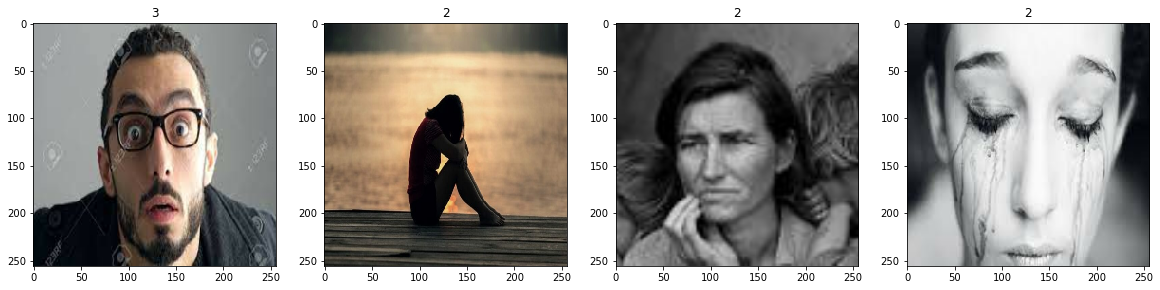

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
batch[0].max()

1.0

# 4. Scale Data

In [20]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
batch = data.as_numpy_iterator().next()

# 5. Split Data

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [22]:
print(len(data), train_size, val_size, test_size, train_size+val_size+test_size) 

19 13 4 2 19


In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [23]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='sigmoid'))

In [27]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [29]:
logdir='logs'

In [30]:
logs = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[logs])

Epoch 1/20
13/13 [==============================] - 5s 188ms/step - loss: 1.7085 - accuracy: 0.2452 - val_loss: 1.4197 - val_accuracy: 0.3359
Epoch 2/20
13/13 [==============================] - 3s 227ms/step - loss: 1.3738 - accuracy: 0.3173 - val_loss: 1.2766 - val_accuracy: 0.5078
Epoch 3/20
13/13 [==============================] - 3s 226ms/step - loss: 1.2324 - accuracy: 0.4183 - val_loss: 1.1268 - val_accuracy: 0.5391
Epoch 4/20
13/13 [==============================] - 3s 226ms/step - loss: 1.0336 - accuracy: 0.5481 - val_loss: 0.8413 - val_accuracy: 0.7266
Epoch 5/20
13/13 [==============================] - 3s 224ms/step - loss: 0.8400 - accuracy: 0.6635 - val_loss: 0.6668 - val_accuracy: 0.7734
Epoch 6/20
13/13 [==============================] - 3s 226ms/step - loss: 0.6079 - accuracy: 0.7716 - val_loss: 0.5638 - val_accuracy: 0.7734
Epoch 7/20
13/13 [==============================] - 4s 229ms/step - loss: 0.4744 - accuracy: 0.8341 - val_loss: 0.3918 - val_accuracy: 0.9062
Epoch 

# 8. Plot Performance

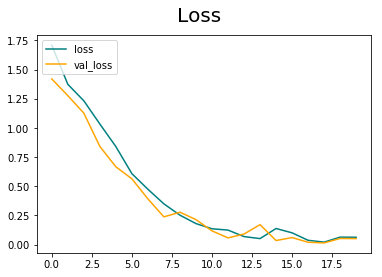

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

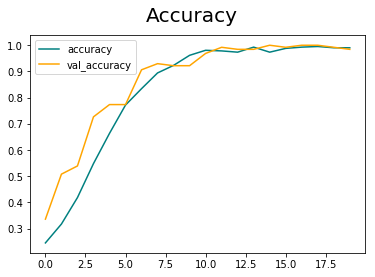

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Test

In [16]:
import cv2

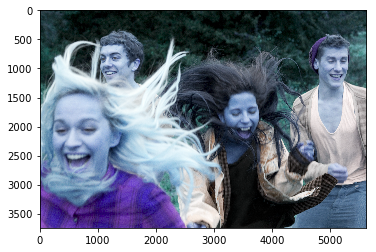

In [17]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

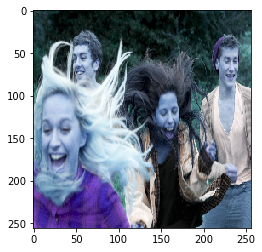

In [18]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [34]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 59ms/step


In [35]:
yhat

array([[9.8913354e-01, 9.9999082e-01, 9.6649373e-01, 9.2144990e-01,
        4.3931558e-10]], dtype=float32)

# 10. Save the Model

In [10]:
from tensorflow.keras.models import load_model

In [36]:
model.save(os.path.join('models','fourImageclassifier.h5'))

In [37]:
new_model = load_model(os.path.join('models', 'fourImageclassifier.h5'))

In [38]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 59ms/step


array([[9.8913354e-01, 9.9999082e-01, 9.6649373e-01, 9.2144990e-01,
        4.3931558e-10]], dtype=float32)

## 11. Model Test

1/1 [==============================] - 0s 16ms/step


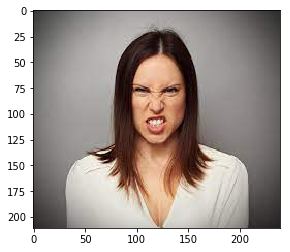

Angry


In [55]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

emotions = {"Angry":0, "Happy": 0, "Sad":0, "Surpirse":0}

image_name = "Angry.jpg"
image = cv2.imread(image_name)
resize = tf.image.resize(image, (256, 256))

model_prediction = model.predict(np.expand_dims(resize/255, 0))[0]
for index, emotion in enumerate(emotions):
    emotions[emotion] = model_prediction[index]

predicted_emotion = max(zip(emotions.values(), emotions.keys()))[1]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image.astype(int))
plt.show()
print(predicted_emotion)